*Questão 01 item a*

importando as bibliotecas necessárias

In [159]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Pegando os dados e separando uma cópia para trabalho

In [160]:
data = np.genfromtxt("./artificial1d.csv", delimiter=",")
#separando os dados de work
work = data.copy()

Definindo as funções de normalização e normalizando os dados

In [161]:
def minMax(data):
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    
    denom = max_vals - min_vals
    denom[denom == 0] = 1

    return (data - min_vals) / denom

def standard(data):
    means = data.mean(0)
    stds = np.sqrt((np.sum((data - means)**2,axis=0))/(data.shape[0] - 1))
    return [means, stds, (data - means)/stds]

def standardRev(data, means, stds): #função inversa da normalização standard
    return data*stds + means

#separando as features e os valores desejados
X = work[:,[0]] 
Y = work[:,[1]]
X = minMax(X) #normalizando os dados de teste
[means, stds, Y] = standard(Y)

Calculando os pesos por OLS, depois calculando os Y previstos e o erro MSE

In [162]:
#Concatenando uma coluna de 1 ao X
X = np.concatenate((np.ones((X.shape[0],1)), X), 1)
#calculando os pesos por OLS
W = np.linalg.solve(X.T@X, X.T@Y)
#calculando os dados previsto e obtendo o MSE
Y_predicted = X @ W

#desnormalizando para que o erro esteja na mesma escala
Y = standardRev(Y, means, stds)
Y_predicted = standardRev(Y_predicted, means, stds)

mse = np.mean((Y - Y_predicted)**2)

Plotando o gráfico com os dados reais, os previstos e o MSE

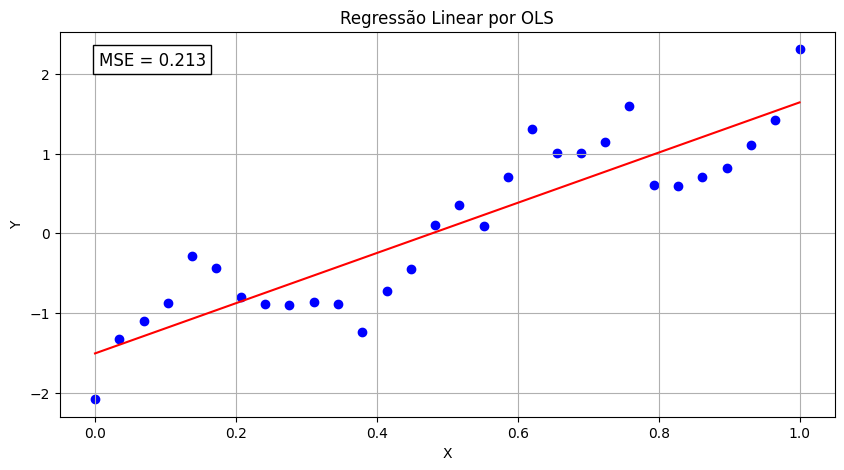

In [163]:
# Plotando
plt.figure(figsize=(10, 5))
plt.scatter(X[:,1], Y, color='blue', label='Dados de treino')
plt.plot(X[:,1], Y_predicted, color='red', label='Regressão linear (OLS)')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão Linear por OLS")
plt.text(0.05, 0.95, f"MSE = {mse:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
plt.grid(True)
plt.show()